In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the function sin(x^2)
def f(x):
    return np.sin(x**2)

# Defining the actual derivative of f(x)
def f_dash(x):
    return 2*x*np.cos(x**2)

# Defining second derivative of f(x)
def f_double_dash(x):
    return 2*np.cos(x**2) - 4*x**2*np.sin(x**2)

# Defining the <forward,backward,centered> finite difference approximation of f(x)
def delta_plus(x, h):
    return (f(x + h) - f(x)) / h
def delta_minus(x, h):
    return (f(x) - f(x - h)) / h
def delta_centered(x, h):
    return (f(x + h) - f(x - h)) / (2*h)



In [3]:
x_values = np.linspace(0, 1, 100)
y_values = f_dash(x_values)

def compute_error(delta, x_values, h):
    return abs(y_values - delta(x_values, h))

def compute_theoreticalError(h):
    max_deltaPlus_err, max_deltaCentered_err = 0,0

    for x in x_values:
        max_primeprimeError_plus  = max((f_double_dash(xx)) for xx in np.linspace(x, x+h, 100))
        min_primeprimeError_plus  = min((f_double_dash(xx)) for xx in np.linspace(x, x+h, 100))
        max_primeprimeError_minus = max((f_double_dash(xx)) for xx in np.linspace(x-h, x, 100))
        min_primeprimeError_minus = min((f_double_dash(xx)) for xx in np.linspace(x-h, x, 100))
    
        # max theoretical abs error for delta+ is (h/2) max(f"(c))over c in x to x+h
        max_deltaPlus_err = max(max_deltaPlus_err, max(abs(max_primeprimeError_plus),abs(min_primeprimeError_plus))*(h/2))

        # max theoretical abs error for deltac is (h/4) max(f"(c1) - f"(c2))over c1 in x to x+h and c2 in x-h to x
        max_deltaCentered_err = max(max_deltaCentered_err, max(abs(max_primeprimeError_plus - max_primeprimeError_minus),abs(min_primeprimeError_plus - min_primeprimeError_minus))*(h/4))

    return max_deltaPlus_err, max_deltaCentered_err

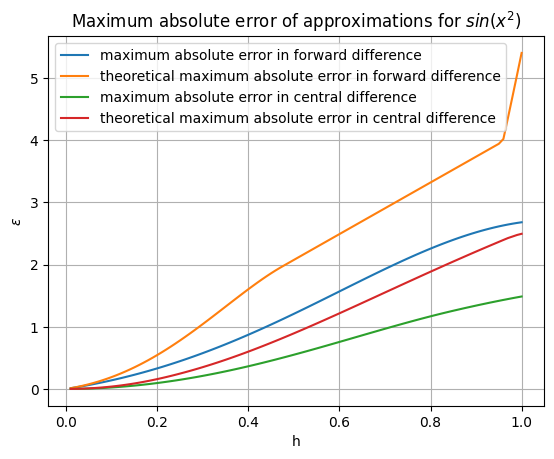

In [4]:
# Generating data for plotting
hs = [i*0.01 for i in range(1,101)]

maxErr_delta_plus,maxErr_delta_c=[],[]

for h in hs:
    ans_delta_plus, ans_delta_centered = max(compute_error(delta_plus, x_values, h)), max(compute_error(delta_centered, x_values, h))
    maxErr_delta_plus.append(ans_delta_plus)
    maxErr_delta_c.append(ans_delta_centered)

theoErr_delta_plus,theoErr_delta_c=[],[]
for h in hs:
    aa, bb = compute_theoreticalError(h)
    theoErr_delta_plus.append(aa)
    theoErr_delta_c.append(bb)

# Plotting...
plt.plot(hs, maxErr_delta_plus, label="maximum absolute error in forward difference")
plt.plot(hs, theoErr_delta_plus, label="theoretical maximum absolute error in forward difference")
plt.plot(hs, maxErr_delta_c, label="maximum absolute error in central difference")
plt.plot(hs, theoErr_delta_c, label="theoretical maximum absolute error in central difference")
plt.legend()
plt.title("Maximum absolute error of approximations for " +r"$sin(x^2)$")
plt.xlabel("h")
plt.ylabel(r"$\epsilon$")
plt.grid()
plt.show()